# <center>R5.A.11 - Méthodes d'optimisation <br> TP1a - Recuit Simulé</center>


 <center>      <i> Tom Ferragut, Thibault Godin </i> <br> <i>IUT de Vannes, BUT Informatique </i> </center>


### imports


In [9]:
import numpy as np

import random

import math
# Affichage graphique

#%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline


import matplotlib.pyplot as plt

import time

from ipywidgets import interact
import ipywidgets as widgets



## Vocabulaire et intuition

La méthode du recuit simulé (en anglais _simulated annealing_) a été proposée en informatique dans les années 80, par analogie avec une technique dite du recuit, utilisée en science de matériaux et en particulier en sidérurgie.

Il s'agit d'un principe général de construction d'algorithmes pour résoudre des problèmes d'optimisation difficiles.

Cette métaheuristique est assez bien comprise, d'un point de vue théorique, et permet la création d'algorithmes relativement simples. 

Soit un problème d'optimisation combinatoire où l'on a 


- un ensemble de configuration $\Omega = \{w_1,...,w_N\}$

- une fonction de coût (aussi appelée fonction d'energie) $c:\Omega \to \mathbb{R}_+$

- une fonction de voisinage $V:\Omega \to \mathcal{P}(\Omega)$



La méthode du recuit simulé vise à trouver la configuration de coût (energie) minimal.


La méthode est alors assez intuitive : 

Au départ on commence avec une configuration arbitraire. 

Soit $w$ la configuration courante. 

À chaque itération, une configuration candidate $w'$ est choisie uniformément dans le voisinage de la solution courante ; et acceptée avec une probabilité $\min( 1, e^{-\frac{c(w) -c(w')}{T}})$

Le paramètre $T$ s’appelle la _température_ et tend vers $0$ (de manière
monotone), selon une fonction appelée _loi de décroissance de la température_. La meilleure solution rencontrée durant l’exécution de l’algorithme est mémorisée et écrite lorsque la condition d’arrêt choisie est vérifiée.

## 1 - Optimisation de fonctions 1D

On va commencer par des exemples simples : des fonctions $f : \: \mathbb{R} \to \mathbb{R}$ (comme l'an dernier en R4.04), et pour débuter la fonction définie par $f(x) = x^2 -1$.

Pour fonction de voisinage, on prendra comme transition la loi uniforme sur $[-0.5, 0,5]$ (ce choix est arbitraire mais malheureusement a un impact non négligeable sur la vitesse de convergence).

Contrairement à la méthode de gradient de l'an dernier, la recherche n'est pas dirigée mais ressemble plus à une marche au hasard. 

Avantage : simplicité (pas de dérivée à calculer, moins de conditions)

Inconvénient : on exploite pas du tout la structure locale de la fonction.

> __Question 1__ : Bien lire le code donné ci-dessous, le comprendre et le commenter

In [24]:
def f(x):
    #fonction simple à tester
    #minimum théorique f(0)=-1
    return x**2 - 1

#the energy function is the function itself
def energy(x):
    return f(x)
  
#we pick a random point nearby the current position
def neighbour(x):
    return x + random.uniform(-0.5, 0.5)

def simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate):
    current_x = initial_x
    current_energy = energy(current_x)
    temperature = initial_temperature

    for iteration in range(max_iterations):
        # Generate a neighboring solution
        new_x = neighbour(current_x)
        new_energy = energy(new_x)

        # Calculate the change in energy
        delta_energy = new_energy - current_energy

        # Accept the new solution if it's better or with a certain probability
        if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
            current_x = new_x
            current_energy = new_energy

        # Cool down the temperature
        temperature *= cooling_rate

    return current_x, f(current_x)

#initial_x = random.uniform(-10, 10)
initial_x = math.pi
max_iterations = 1000
initial_temperature = 1.0
cooling_rate = 0.99

min_x, min_value = simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate)

print(f"Minimum value found at x = {min_x}, f(x) = {min_value}")


Minimum value found at x = -0.0014936339852816838, f(x) = -0.999997769057518


Cette fonction marche plutôt bien, mais on n'a pas trop d'idée de ce qui s'est passé.
On va donc la réécrire en conservant l'historique (et en ajoutant des widgets pour essayer de mieux comprendre ce qui se passe.

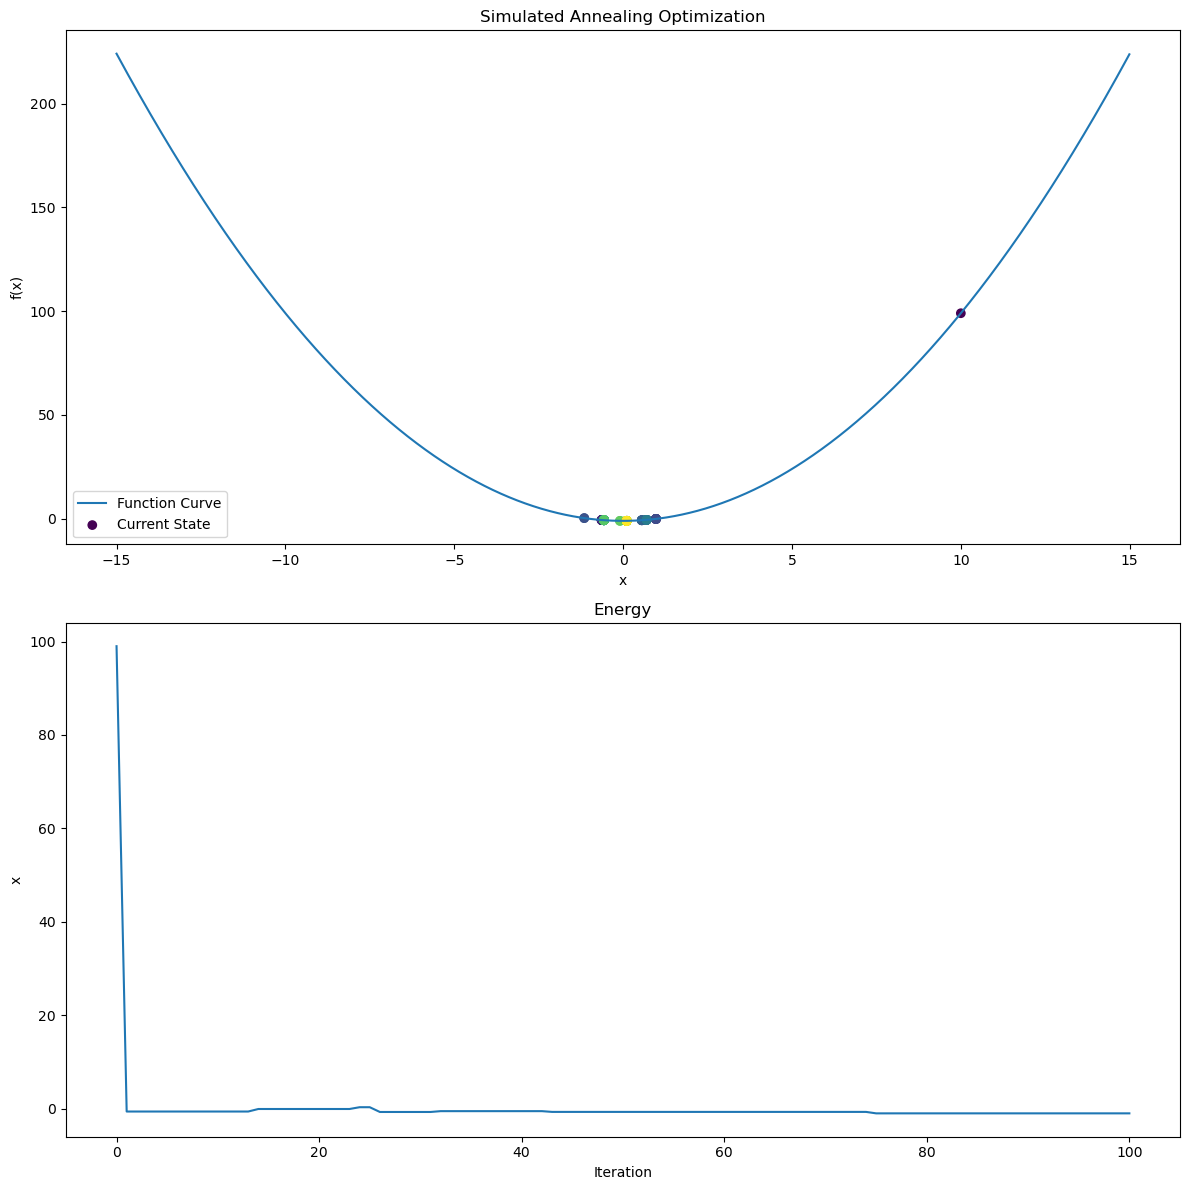

interactive(children=(FloatSlider(value=1.0, description='Initial Temp.', max=10.0, min=0.01, step=0.01), Floa…

<function __main__.plot_simulated_annealing(initial_temperature, cooling_rate)>

In [27]:
def simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate):
    current_x = initial_x
    current_energy = energy(current_x)
    temperature = initial_temperature

    x_values = [current_x]
    energy_values = [current_energy]

    for iteration in range(max_iterations):
        new_x = neighbour(current_x)
        new_energy = energy(new_x)

        delta_energy = new_energy - current_energy

        if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
            current_x = new_x
            current_energy = new_energy

        temperature *= cooling_rate

        x_values.append(current_x)
        energy_values.append(current_energy)

    return x_values, energy_values

def plot_simulated_annealing(initial_temperature, cooling_rate):
    #initial_x = random.uniform(-10, 10)
    initial_x = 10
    #fixed for comparaisons    
    max_iterations = 100
    cmap = plt.get_cmap('viridis')

    
    
    x_values, energy_values = simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate)

    
    # Plot the function curve and the current state
    x = np.arange(-15, 15,0.01)
    y = [f(xi) for xi in x]

    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)

    plt.plot(x, y, label='Function Curve')
    plt.scatter(x_values, [f(xi) for xi in x_values], c=range(len(x_values)), cmap=cmap, label='Current State', marker='o')
    plt.title('Simulated Annealing Optimization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

    
    

    plt.subplot(2, 1, 2)
    plt.plot(energy_values, label='x')
    plt.title('Energy')
    plt.xlabel('Iteration')
    plt.ylabel('x')

    plt.tight_layout()
    plt.show()

interact(
    plot_simulated_annealing,
    initial_temperature=widgets.FloatSlider(min=0.01, max=10.0, step=0.01, value=1.0, description='Initial Temp.'),
    cooling_rate=widgets.FloatSlider(min=0.90, max=0.9999, step=0.0001, value=0.99, description='Cooling Rate')
)

> __Question 2__ : Essayer de modifier l'algorithme en prenant comme fonction de voisinage un point aléatoire de $[-15,15]$ (plutôt qu'un réél voisin). Que constatez-vous ?

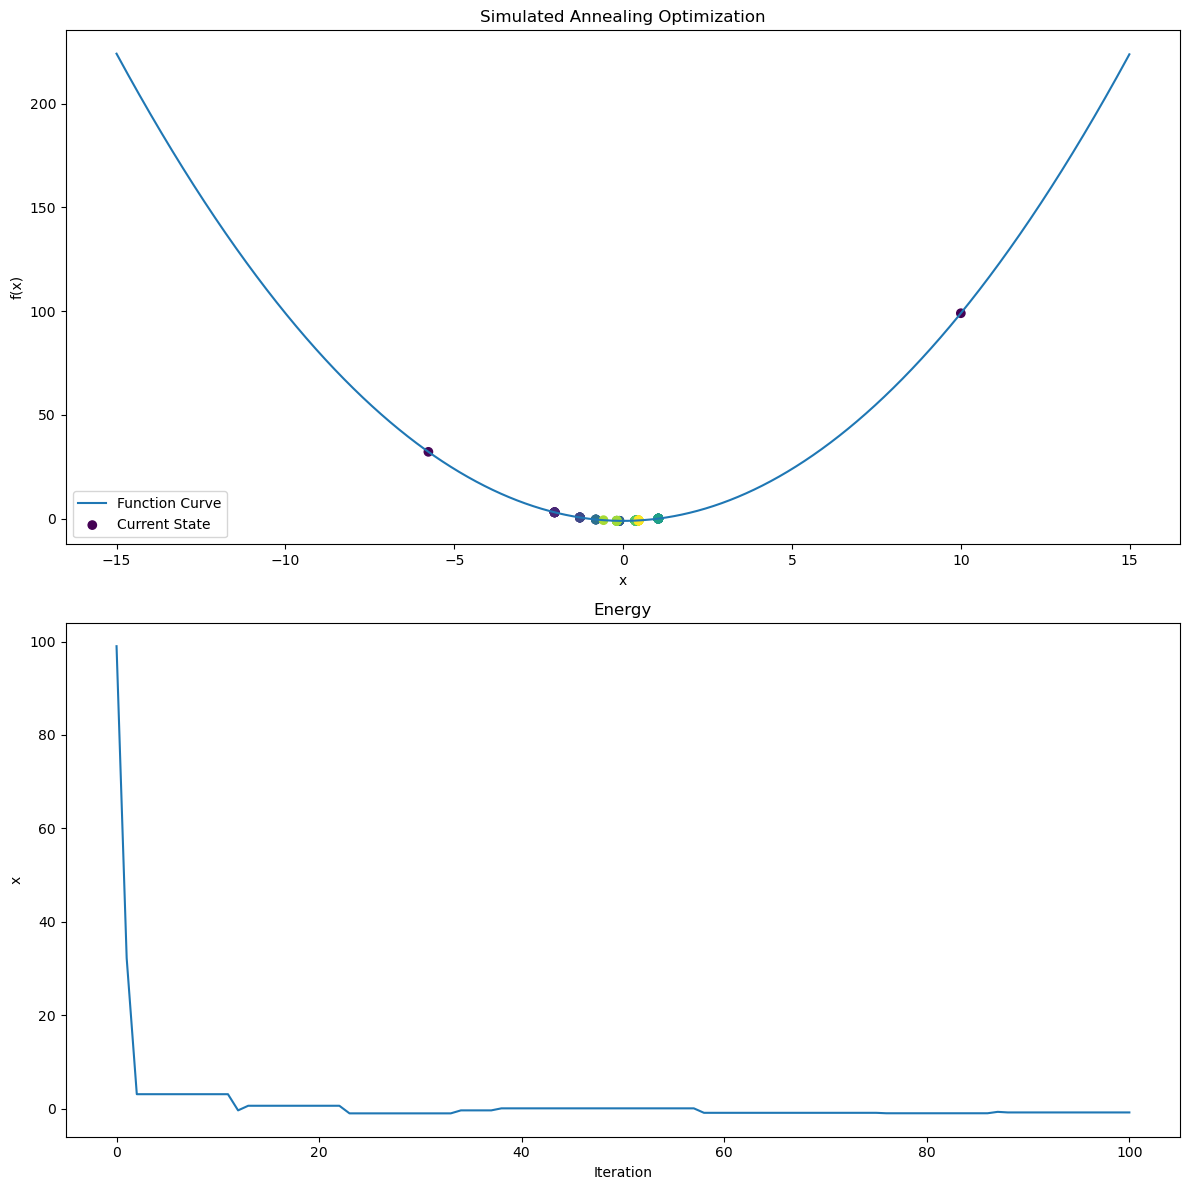

interactive(children=(FloatSlider(value=1.0, description='Initial Temp.', max=5.0, min=0.01, step=0.01), Float…

<function __main__.plot_simulated_annealing(initial_temperature, cooling_rate)>

In [30]:
#we pick a random point in [-15,15]
def neighbour(x):
    return -1



> __Question 3__ : Expliquez ce que changent les paramètres `initial_temperature` et `cooling_rate` dans le comportement de l'algorithme.
Tester l'algorithme fourni sur les différentes fonctions à optimiser proposées.

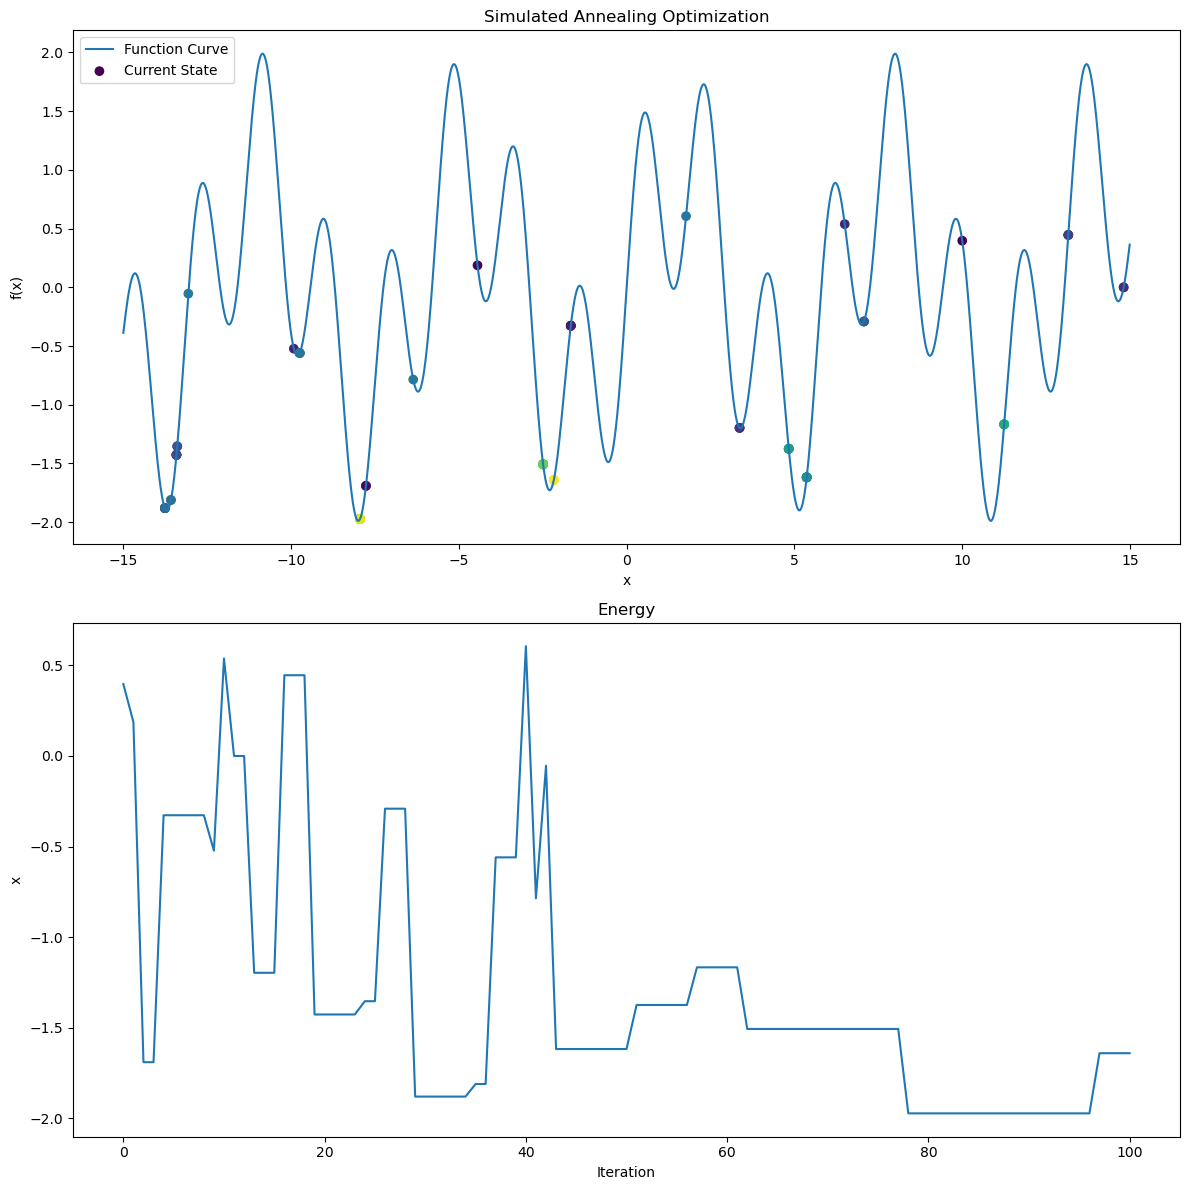

interactive(children=(FloatSlider(value=1.0, description='Initial Temp.', max=5.0, min=0.01, step=0.01), Float…

<function __main__.plot_simulated_annealing(initial_temperature, cooling_rate)>

In [31]:
def f(x):
    #return x**2 - 1
    #https://machinelearningmastery.com/1d-test-functions-for-function-optimization/
    #return -(x + math.sin(x)) * math.exp(-x**2.0)
    return math.sin(x) + math.sin((10.0 / 3.0) * x)

    

interact(
    plot_simulated_annealing,
    initial_temperature=widgets.FloatSlider(min=0.01, max=5.0, step=0.01, value=1.0, description='Initial Temp.'),
    cooling_rate=widgets.FloatSlider(min=0.90, max=0.9999, step=0.0001, value=0.99, description='Cooling Rate')
)


## 2 - Optimisation d'une fonction 2D

A vous d'optimiser une fonction, cette fois en 2 dimension

In [62]:
from mpl_toolkits.mplot3d import Axes3D 

cmap_reversed = plt.cm.get_cmap('RdBu_r')


def f(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def f(X):
    x,y = X # Permet de récupérer chacun des éléments de X dans une variable différente.
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

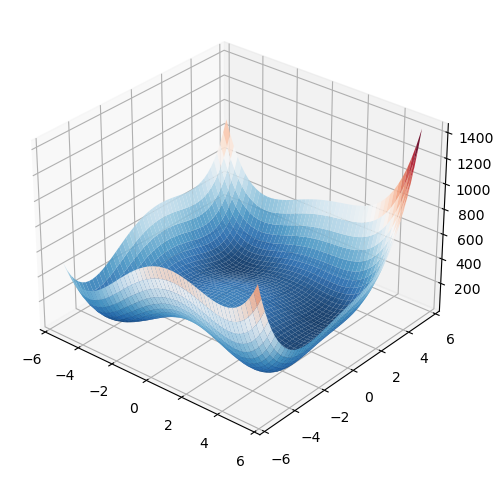

In [63]:
X,Y = np.meshgrid(np.linspace(-5.5, 5.5, 50),
                     np.linspace(-5.5, 5.5, 50))
Z = f([X,Y])  # Altitude


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(30, -50)
ax.plot_surface(X,Y, Z, rstride=1, cstride=1, edgecolor='none',alpha=0.9,cmap=cmap_reversed)

plt.tight_layout()
plt.show()


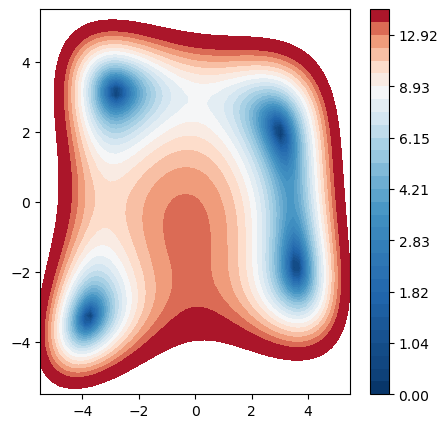

In [64]:

##vue du dessus pour augmenter la lisbilité
##passage à la racine carrée pour les même raisons
X,Y = np.meshgrid(np.linspace(-5.5, 5.5, 50),
                     np.linspace(-5.5, 5.5, 50))
levels = list(1.7 ** np.linspace(0, 10, 30) - 1.)+[300]
plt.figure(figsize=(5, 5))
plt.contourf(X, Y, np.sqrt(Z), levels=np.sqrt(levels), cmap=cmap_reversed)
plt.colorbar()
plt.show()

> __Question 1__ : écrire une fonction effectuant la recherche de minimum par la méthode du recuit simulé

In [65]:
#the energy function is the function itself
def energy(X):
    return -1
  
#we pick a random point nearby the current position
def neighbour(X):
    return -1

In [68]:
def simulated_annealing2D(initial_X, max_iterations, initial_temperature, cooling_rate):

    return -1

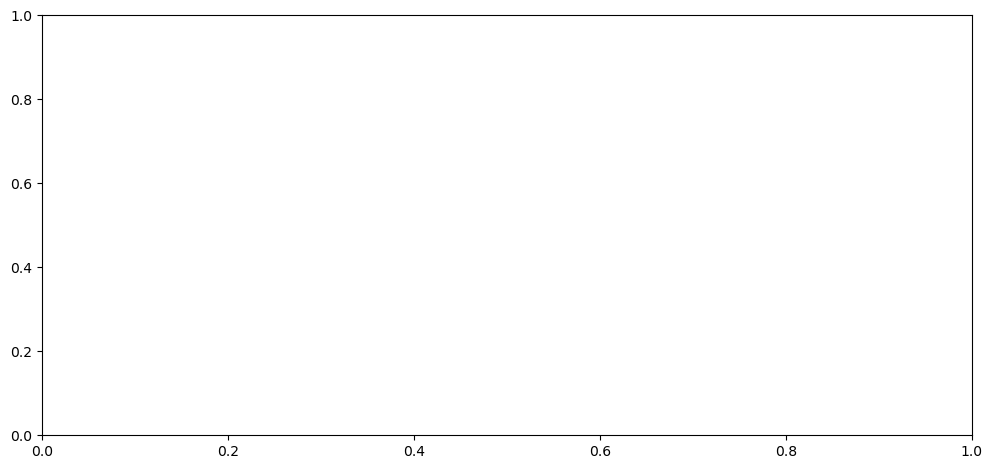

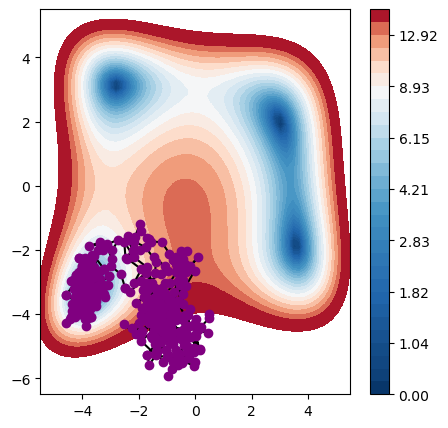

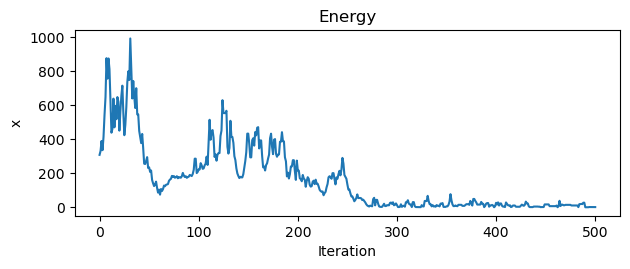

In [95]:
X,Y = np.meshgrid(np.linspace(-5.5, 5.5, 50),np.linspace(-5.5, 5.5, 50))
def plot_simulated_annealing2D(x0,y0,max_iterations, initial_temperature, cooling_rate):
    
    
    # Plot the function curve and the current state


    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)

    levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
    plt.figure(figsize=(5, 5))
    plt.contourf(X, Y, np.sqrt(Z), levels=np.sqrt(
        levels), cmap=cmap_reversed)
    plt.colorbar()
    xs=simulated_annealing2D([x0,y0],max_iterations, initial_temperature, cooling_rate)
    xr = np.array(xs[0])
    xt=xr.transpose()
    plt.plot(xt[0], xt[1], 'k')
    plt.plot(xt[0], xt[1], 'o', color='purple')
    plt.show()

    
    

    plt.subplot(2, 1, 2)
    energy_values = xs[1]
    plt.plot(energy_values, label='x')
    plt.title('Energy')
    plt.xlabel('Iteration')
    plt.ylabel('x')

    plt.tight_layout()
    plt.show()
    

    
x0,y0=0.5, -4 

plot_simulated_annealing2D(x0,y0,500, 1000, .99)


## 3 - Travelling Salesperson Problem

On va maintenant s'intéresser au problème classique du voyageur de commerce (présenté dans le CM1) et chercher à reproduire l'exemple (simple du cours).

> __Question 1__ : rentrer la matrice correspondant au graphe (pondéré) du CM

{(0, 1): Text(0.6545019520861146, 0.4755372637040107, '5'),
 (0, 2): Text(0.09549216003690497, 0.2938924071154714, '-5'),
 (0, 4): Text(0.6545020265933295, -0.47553723390112435, '10'),
 (1, 2): Text(-0.24999435749103416, 0.7694227652390964, '20'),
 (1, 3): Text(-0.2499988173974228, 0.18163728210053232, '6'),
 (1, 4): Text(0.30901702669304876, 1.1471085095138278e-06, '5'),
 (2, 3): Text(-0.8090170266927986, -6.689275629634395e-06, '15'),
 (2, 4): Text(-0.2500011826028019, -0.18163396514560104, '5'),
 (3, 4): Text(-0.25000564250942126, -0.7694190646229679, '10')}

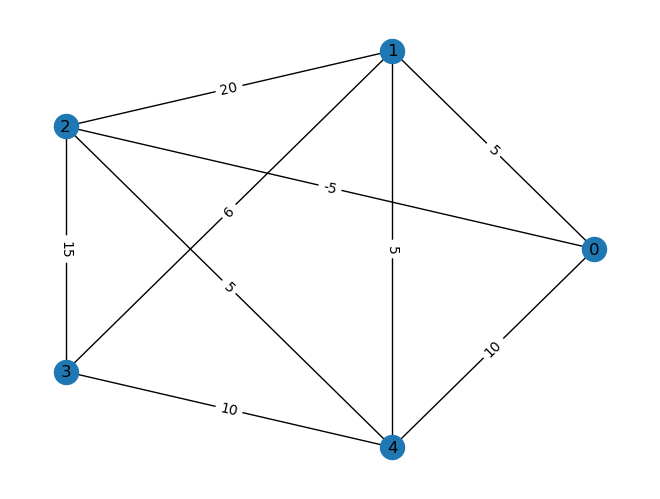

In [41]:
import networkx as nx


W = np.array([[1]
])

G = nx.from_numpy_array(W)

nx.draw(G, with_labels=True,pos=nx.circular_layout(G))
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos=nx.circular_layout(G),edge_labels=labels)

> __Question 2__ : écrire la configuration initial (le cycle $A-B-C-D-E$) ainsi qu'une fonction de coût adaptée au problème

In [42]:

def energy_tour(tour,W=W):

    return -1


energy_tour(tour)

60

> __Question 3__ : écrire une fonction de voisinage adaptée au problème (a priori échanger l'ordre de 2 villes consécutives)

In [43]:
def neighbour_tour(tour):
    

        
    
    return tour

neighbour_tour(tour)


array([1, 0, 2, 3, 4])

> __Question 4__ : écrire une fonction résolvant le TSP pour notre exemple (normalement on peut faire mieux que le CM)

In [47]:
def simulated_annealing_tour(initial_tour, max_iterations, initial_temperature, cooling_rate):
    current_tour = initial_tour
    current_energy = energy_tour(current_tour)
    temperature = initial_temperature

    tour_values = [current_tour]
    energy_values = [current_energy]

    return tour_values, energy_values

simulated_annealing_tour(np.arange(5),50,100,.8)

([array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 1, 4, 2, 3]),
  array([0, 

> __Question bonus__ : écrire le programme afin de visualiser l'évolution pas à pas de l'algorithme.

### À venir : 
TP1b : sudoku et voyageur de commerce bis

### Exposés possibles :

($\star$) comparaison des méthodes du recuit simulé et du gradient

 ($\star$) étude exhaustive de https://machinelearningmastery.com/1d-test-functions-for-function-optimization/ par la méthode du recuit simulé

($\star$) étude poussée de https://fr.wikipedia.org/wiki/Fonction_de_test_pour_l%27optimisation  par la méthode du recuit simulé

 ($\star\star$) création et étude qualitative des images https://en.wikipedia.org/wiki/File:SimulatedAnnealingFast.jpg et https://commons.wikimedia.org/wiki/File:SimulatedAnnealingSlow.jpg

 ($\star\star$) compréhension et réécriture de https://math.stackexchange.com/questions/2096176/are-there-3-disjoint-copies-of-2k-3-3-cup-k-5-5-setminus-c-10-in

 ($\star - \star\star$) exemples tirés de 
http://www.lps.ens.fr/%7Eweisbuch/livre/b9.html